### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [379]:
data = pd.read_csv('data/coupons.csv')

In [380]:
pd.options.display.max_columns = None
data.sample(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2661,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,26,Married partner,1,Bachelors degree,Architecture & Engineering,$37500 - $49999,NaN,never,1~3,1~3,1~3,less1,1,0,0,0,1,0
937,Home,Alone,Sunny,55,6PM,Bar,1d,Female,31,Single,0,Graduate degree (Masters or Doctorate),Life Physical Social Science,$50000 - $62499,NaN,1~3,4~8,4~8,4~8,4~8,1,0,0,1,0,1


2. Investigate the dataset for missing or problematic data.

In [381]:
# have a look at the columns and details in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [382]:
#List out columns with object datatypes (ie: the categorical values) and see unique values in each
#to help us decide what to clean or correct, also usefull as ref to decide what to query for
print(f"Unique Values for categorical columns:")
for col in data.select_dtypes(include='object'):
  print(f"  - {col}: {data[col].unique()}\n")

Unique Values for categorical columns:
  - destination: ['No Urgent Place' 'Home' 'Work']

  - passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

  - weather: ['Sunny' 'Rainy' 'Snowy']

  - time: ['2PM' '10AM' '6PM' '7AM' '10PM']

  - coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

  - expiration: ['1d' '2h']

  - gender: ['Female' 'Male']

  - age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

  - maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

  - education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

  - occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Scie

In [383]:
#look at the numerical data aswell
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [406]:
#drop the car column as most of it is empty 
data = data.drop(['car'], axis=1)
#remove rows with NaN they represent a very small part of the total dataset
data = data.dropna()
#correct spelling typo:
data.rename(columns = {'Passanger':'Passenger'}, inplace = True)
#for consistency lets capitalize all our columns for easier reference
data.columns = [x.capitalize() for x in data.columns]
#convert the accepted column to a new col as a string so they are seen as categories
#so plotly groups them rather than display as continous values
data['Accepted'] = data['Y'].astype(str)
data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Destination           12079 non-null  object
 1   Passenger             12079 non-null  object
 2   Weather               12079 non-null  object
 3   Temperature           12079 non-null  int64 
 4   Time                  12079 non-null  object
 5   Coupon                12079 non-null  object
 6   Expiration            12079 non-null  object
 7   Gender                12079 non-null  object
 8   Age                   12079 non-null  object
 9   Maritalstatus         12079 non-null  object
 10  Has_children          12079 non-null  int64 
 11  Education             12079 non-null  object
 12  Occupation            12079 non-null  object
 13  Income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  Coffeehouse           12079 non-null  ob

In [407]:
#create a new simple dataframe showing total accepted vs not
newdata = data.groupby(['Y']).size().reset_index()
newdata = newdata.rename(columns = {"Y" : "Accepted", 0 : "Count"})
newdata

,Accepted,Count
0,0,5202
1,1,6877


4. What proportion of the total observations chose to accept the coupon? 



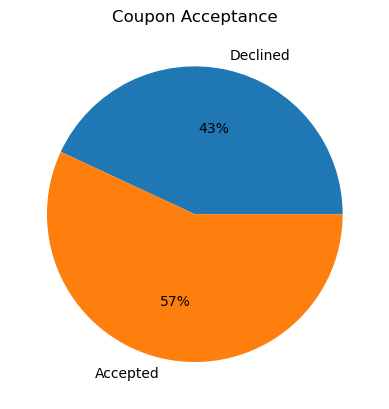

In [408]:
#lets show a pie chart to visualize better
plt.pie(data.groupby('Y').size(), labels=["Declined", "Accepted"], autopct='%.0f%%')
plt.title('Coupon Acceptance')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

In [409]:
#Exploring data further: A bar chart with coupon and wether or not it was accepted
coupons = px.histogram(data, x='Coupon', color='Accepted')
coupons.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temp vs Coupons Offered')

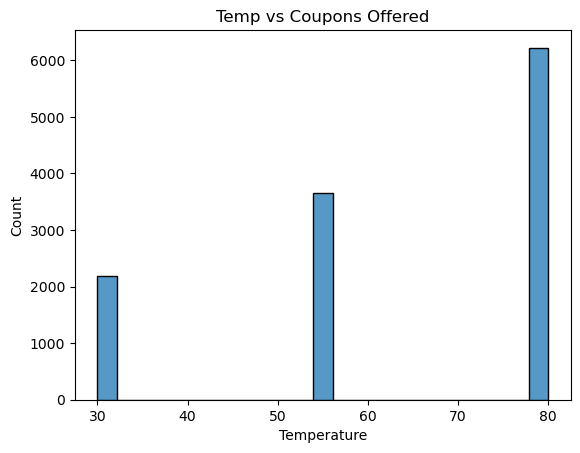

In [447]:
#histogram using seaborn
sns.histplot(data=data, x='Temperature')
plt.title('Temp vs Coupons Offered')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [411]:
#new DF created with just coupon "Bar"
dfbar = data.query('Coupon == "Bar"')
print(f"Total bar coupons offered : ",dfbar.shape[0])

Total bar coupons offered :  1913


2. What proportion of bar coupons were accepted?


In [412]:
#do a count of the individual values then 
couponsbar_pct = dfbar['Y'].value_counts(normalize = True)*100
print(f"The percentage of non accepted (Y=0) and accepted (Y=1) bar coupons are : ",'\n',couponsbar_pct)

The percentage of non accepted (Y=0) and accepted (Y=1) bar coupons are :  
 Y
0    58.808155
1    41.191845
Name: proportion, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [413]:
#setup lists for the parameters we want to find/search for:
fewer_three = ['never', 'less1', '1~3']
dfbar_fewerthree = dfbar.query('Bar in @fewer_three & Y == 1')
greater_three = ['4~8']
#run the queries with the filters we want to find using the lists above where applicable
dfbar_greaterthree = dfbar.query('Bar in @greater_three & Y == 1')
#print out results
print("number of accepted bar coupons going to bar 3 times or less : ", dfbar_fewerthree.shape[0])
print("number of accepted coupons going to bar more than 3 times : ", dfbar_greaterthree.shape[0])

number of accepted bar coupons going to bar 3 times or less :  641
number of accepted coupons going to bar more than 3 times :  114


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [414]:
#setup lists for the parameters we want to find/search for:
ages = ['46', '26', '31', '41', '50plus', '36']
barfreq = ['1~3', '4~8']    
#run the queries with the filters we want to find using the lists above where applicable
dfbar_over_twenty_five = dfbar.query('Bar in @barfreq & Age in @ages & Y == 1')
dfbar_others = dfbar.query('Y == 1')  
#print out results
print("number of accepted bar coupons more than 1x a month and >25 yoa : ", dfbar_over_twenty_five.shape[0])
print("number of accepted bar coupons : ", dfbar_others.shape[0])

number of accepted bar coupons more than 1x a month and >25 yoa :  257
number of accepted bar coupons :  788


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [415]:
#setup lists for the parameters we want to find/search for:
passengers = ['Friend(s)', 'Partner']
barfreq = ['1~3', '4~8']
#run the queries with the filters we want to find using the lists above where applicable
#rather than use big list use invest logic to exclude Farming Fifhing etc
dfbar_q = dfbar.query('Bar in @barfreq & Passenger in @passengers & Occupation != "Farming Fishing & Forestry" & Y == 1')
dfbar_others = dfbar.query('Y == 1')    
#print out results
print("number of accepted bar coupons with passengers not kids : ", dfbar_q.shape[0])
print("number of accepted bar coupons : ", dfbar_others.shape[0])

number of accepted bar coupons with passengers not kids :  122
number of accepted bar coupons :  788


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [416]:
#setup some simple lists for the parameters we want to find/search for:
passengers = ['Friend(s)', 'Partner']
barfreq = ['1~3', '4~8']
restfreq = ['4~8', 'gt8']
ages = ['21', '26', 'below21']
#run the queries with the filters we want to find using the lists above where applicable
dfbar_qa = dfbar.query('Bar in @barfreq & Passenger in @passengers & Maritalstatus != "Widowed"  &  Y == 1')
dfbar_qb = dfbar.query('Bar in @barfreq & Age in @ages &  Y == 1')
dfbar_qc = data.query('Bar in @barfreq & Restaurantlessthan20 in @restfreq &  Y == 1')
dfbar_others = dfbar.query('Y == 1')       
#print out results
print("go to bars more than once a month, had passengers that were not a kid, and were not widowed : ", dfbar_qa.shape[0])
print("go to bars more than once a month and are under the age of 30 : ", dfbar_qb.shape[0])
print("go to cheap restaurants more than 4 times a month and income is less than 50K : ", dfbar_qc.shape[0])
#print("total number of accepted bar coupons : ", dfbar_others.shape[0])


go to bars more than once a month, had passengers that were not a kid, and were not widowed :  122
go to bars more than once a month and are under the age of 30 :  209
go to cheap restaurants more than 4 times a month and income is less than 50K :  1059


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Likely to accept the bar coupon if they go 3x or less.  The secondary factor does seem to be age. I have plotted a basic histogram to show the accepted coupon to those who go 3x or less a month to the bar distributed by age.  

Text(0.5, 1.0, 'Age vs Bar Coupons')

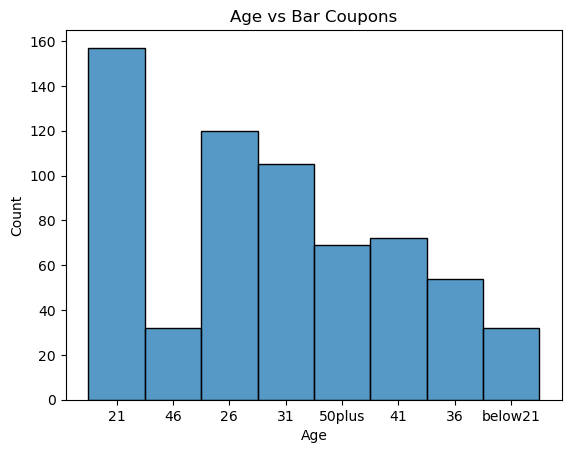

In [448]:
sns.histplot(data=dfbar_fewerthree, x='Age')
plt.title('Age vs Bar Coupons')

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Introduction
For this next part I decided to look deeper into the "cheap restaurant" coupons ie the coupons marked "Restaurant(<20).  As a first step I make a new dataframe for the restaurant coupons to analyze so we don't need to filter these out on each query:  

In [423]:
#let's add some numerical columns to the dataframe with the values we want to target
#break out passengers to numeric columns for correlation analysis
encoded_passenger = pd.get_dummies(data.Passenger)
merged_data = pd.concat([data, encoded_passenger], axis='columns')
#break out destination to numeric to see if correlation exists 
encoded_destination = pd.get_dummies(data.Destination)
merged_data = pd.concat([merged_data, encoded_destination], axis='columns')
#break out weather to numeric columns for correlation analysis
encoded_weather = pd.get_dummies(data.Weather)
merged_data = pd.concat([merged_data, encoded_weather], axis='columns')
#break out Restaurantlessthan20 to columns for correlation analysis
encoded_rest20freq = pd.get_dummies(data.Restaurantlessthan20)
merged_data = pd.concat([merged_data, encoded_rest20freq], axis='columns')
#merged_data.sample(5)
#data.sample(5)

In [424]:
dfr = merged_data.query('Coupon == "Restaurant(<20)"')
print(f"Total cheap restaurant coupons offered : ",dfr.shape[0])

Total cheap restaurant coupons offered :  2653


### Accepted vs Not Accepted 
Lets look at the breakdown of coupons accepted vs declined:

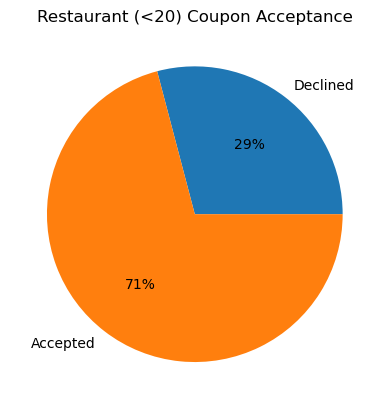

In [425]:
plt.pie(dfr.groupby('Y').size(), labels=["Declined", "Accepted"], autopct='%.0f%%')
plt.title('Restaurant (<20) Coupon Acceptance')
plt.show()

### Hypothesis / Assumptions to test

I have a hypothesis/assumption I would like to test to see if the weather, destination and passengers have any correlation with the coupon being accepted for the restaurant.  To do this I created new columns (see in data cleaning section) to enable income to be plotted on the heatmap using numerical data.  This should allow us to visualize where there are larger percentages accepted.  

It would have also been interesting to reformat the distance columns or GEQ to see the correlations there however due to time and scope of this I will leave this to a later date.

In [ ]:
#if I have time play with the GEQ data here

In [426]:
#create a new dataframe made mostly of the numerical data we are interested in
num_dfr = dfr[['Weather','Has_children','Direction_same','Direction_opp','Y','Alone','Friend(s)','Kid(s)','Partner',
                    'Home','No Urgent Place','Work','Rainy','Snowy','Sunny','never','less1','1~3','4~8','gt8']]


In [427]:
#As the data is mostly boolean lets add the positive data up and group it by accepted, not accepted 
# and the weather to cross reference our other variables to.  We also normalize the amounts to relaive percentages
#in each column
def df_column_normalize(dataframe, percent=False):
    '''Normalizes the values of a given pandas.Dataframe by the total sum of each column.
    If percent=True, multiplies the final value by 100.
    Algorithm based on https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value'''
    if percent:
        return dataframe.div(dataframe.sum(axis=0), axis=1)*100
    else:
        return dataframe.div(dataframe.sum(axis=0), axis=1)

dfr_sum = num_dfr.groupby(['Y','Weather']).sum()

#normalize the data to a %

dfr_sum = df_column_normalize(dfr_sum, percent=True)
dfr_sum

Has_children  Direction_same  Direction_opp      Alone  Friend(s)  \
Y Weather                                                                      
0 Rainy        2.680222        4.356846       3.500691   5.766423   0.506971   
  Snowy        6.284658        0.000000       8.291110  11.678832   1.774398   
  Sunny       21.626617       32.157676      15.660986  18.467153  17.363752   
1 Rainy        2.033272        2.904564       2.257024   2.846715   1.267427   
  Snowy        5.360444        0.000000       8.152925   6.569343   8.365019   
  Sunny       62.014787       60.580913      62.137264  54.671533  70.722433   

              Kid(s)    Partner       Home  No Urgent Place       Work  \
Y Weather                                                                
0 Rainy     0.000000   5.714286   0.000000         1.105651  14.416058   
  Snowy     0.000000   2.448980  14.046122         1.658477  15.693431   
  Sunny    28.915663  13.469388  30.188679        17.813268  11.131387   
1 Rainy     0.000000   5.714286   0.000000         1.474201   7.116788   
  Snowy     0.000000   8.571429   3.563941         7.063882   8.211679   
  Sunny    71.084337  64.081633  52.201258        70.884521  43.430657   

            Rainy      Snowy      Sunny      never      less1        1~3  \
Y Weather                                                                  
0 Rainy    60.625   0.000000   0.000000   4.651163   3.393665   3.613369   
  Snowy     0.000  50.420168   0.000000   6.976744   6.334842   7.226739   
  Sunny     0.000   0.000000  23.174157  25.581395  22.624434  18.699187   
1 Rainy    39.375   0.000000   0.000000   2.325581   1.357466   2.710027   
  Snowy     0.000  49.579832   0.000000  11.627907   7.239819   6.233062   
  Sunny     0.000   0.000000  76.825843  48.837209  59.049774  61.517615   

                 4~8        gt8  
Y Weather                        
0 Rainy     4.139715   2.777778  
  Snowy     7.115136   4.861111  
  Sunny    16.817594  16.319444  
1 Rainy     2.587322   2.083333  
  Snowy     6.727038   6.597222  
  Sunny    62.613195  67.361111

/var/folders/q2/3629kqd10199c_1f07d16_6c0000gn/T/ipykernel_10524/1608554923.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/q2/3629kqd10199c_1f07d16_6c0000gn/T/ipykernel_10524/1608554923.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



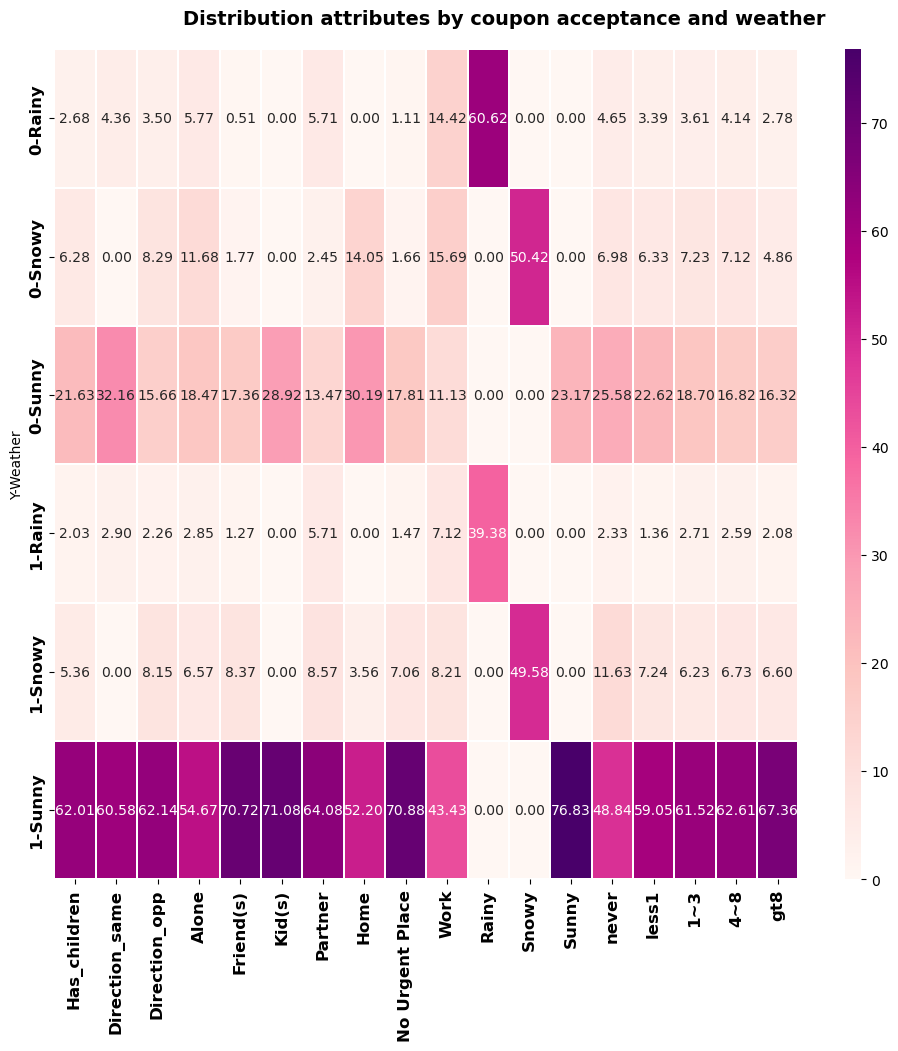

In [441]:
# Now lets draw a matrix of the percentages with a heatmap with the numeric values in each cell using seaborn
figc, ax = plt.subplots(figsize=(12, 10))
figc.subplots_adjust(top=.94)
plt.suptitle('Distribution attributes by coupon acceptance and weather', fontsize=14, fontweight='bold')

ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')

cbar_kws = {'orientation':"vertical", 'pad':0.05, 'aspect':50}
sns.heatmap(dfr_sum, annot=True, fmt='.2f', linewidths=.3, ax=ax, cmap='RdPu', cbar_kws=cbar_kws);

### Sumarry

It looks like there is definatley a relationship between the weather being sunny, not needing to go anywhere urgent and traveling with friends or kids when accepting coupons, lets explore this a little futher below:

In [442]:
#Lets see what the numbers are for each running some simple queries on our dataframe
dfra_sun = dfr.query('Weather == "Sunny" & Y == 1')
dfra_npu = dfr.query('Destination == "No Urgent Place" & Y == 1')
dfra_fre = dfr.query('Passenger == "Friend(s)" & Y == 1')
dfra = dfr.query('Destination == "No Urgent Place" & Weather == "Sunny" & Passenger == "Friend(s)" & Y == 1')
dfra_others = dfr.query('Y == 1')    
#print out results
print("number of accepted cheap restaurant coupons on a sunny day : ", dfra_sun.shape[0])
print("number of accepted cheap restaurant coupons traveling no place urgent : ", dfra_npu.shape[0])
print("number of accepted cheap restaurant coupons traveling with friends : ", dfra_fre.shape[0])
print("number of accepted cheap restaurant coupons accepted traveling no urgent place on a sunny day with friends : ", dfra.shape[0])
print("number of accepted cheap restaurant coupons : ", dfra_others.shape[0])

number of accepted cheap restaurant coupons on a sunny day :  1641
number of accepted cheap restaurant coupons traveling no place urgent :  1293
number of accepted cheap restaurant coupons traveling with friends :  634
number of accepted cheap restaurant coupons accepted traveling no urgent place on a sunny day with friends :  558
number of accepted cheap restaurant coupons :  1881


In [451]:
#plot a histogram using plotly (looks better than seaborn) to show destination vs accepted coupon count
#with a color overlay of the weather
figb = px.histogram(dfr.query('Y == 1'), x='Destination', color='Weather', title="Destination vs Accepted Coupon Count with Weather")
figb.show()

In [450]:
#plot a histogram using plotly (looks better than seaborn) to show destination vs accepted coupon count
#with a color overlay of the passenger
figa = px.histogram(dfr.query('Y == 1'), x='Destination', color='Passenger', title="Destination vs Accepted Coupon Count with Passenger")
figa.show()

In [455]:
#as we have the data lets see if there is any relationship with income?
dfrs = dfr.sort_values(by ='Income', ascending = 1)
figb = px.histogram(dfrs, x='Income', color='Accepted', title="Income bracket vs Coupons")
figb.show()

In [456]:
#as we have the data lets see if there is any relationship with education?
dfrs = dfr.sort_values(by ='Education', ascending = 1)
figc = px.histogram(dfr, x='Education', color='Accepted', title="Eductation vs Coupons")
figc.show()

## Conclusion

We would recommend sending the cheaper resteraunt coupons on a sunny day.  Probably also on a weekend for when people do not need to travel to somewhere in particular.  As a next step I would recomend digging deeper into the GEQ data to see how distance from location has an effect on coupon acceptance.  Then move on to the other categories of coupon and do the same as above.